Build a regression model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

Text(0, 0.5, 'Number of POI returned by FQ server')

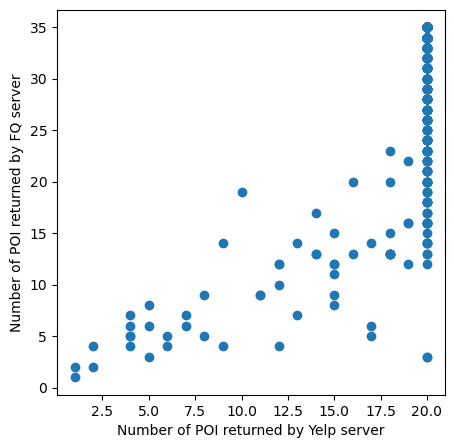

In [2]:
#scatter plot between "nbr of POI FQ / nb of POI Yelp" by bike station
conn = sqlite3.connect("bike-stations-analysis.db")
table = pd.read_sql("""SELECT *
                        FROM analysis_table
                     """, conn
                     )
plt.figure(figsize=(5,5))
plt.scatter(x='nbr of POI yelp',y='nbr of POI FQ',data=table)
plt.xlabel('Number of POI returned by Yelp server')
plt.ylabel('Number of POI returned by FQ server')

<Axes: xlabel='nbr of POI yelp', ylabel='nbr of POI FQ'>

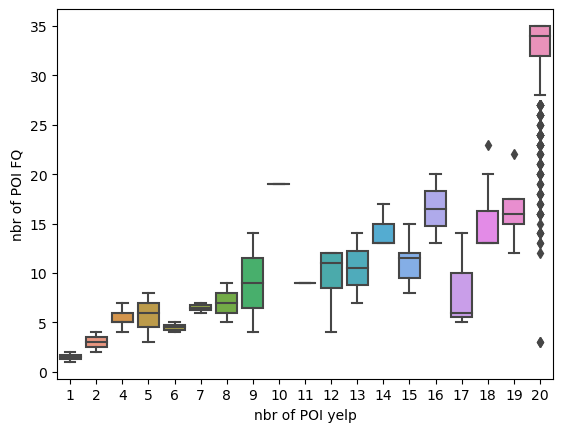

In [12]:
#box plot
sns.boxplot(x='nbr of POI yelp',y='nbr of POI FQ',data=table)

The low slope suggests that in average Yelp returns more Point Of Interest thant Four Square for a specific location 

Provide model output and an interpretation of the results. 

In [11]:
#I was not able to install the statsmodels.formula
import statsmodels.formula.api as smf
import statsmodels.api as sm

y = table['nbr of POI FQ']
x = table['nbr of POI yelp']
x = sm.add_constant(x)
result = sm.OLS(y, x).fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:          nbr of POI FQ   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     701.9
Date:                Mon, 24 Apr 2023   Prob (F-statistic):          3.63e-108
Time:                        18:39:30   Log-Likelihood:                -2226.3
No. Observations:                 714   AIC:                             4457.
Df Residuals:                     712   BIC:                             4466.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.2678      1.476     

1 - The R-squared and the ajusted R-squared are the same since we have only one variable. the value 0.496 tells that about 50% of the variation of in number of POI returned by Four SQuare is explained by the number of POI returned by Yeld 

2 - Prob (F-statistic) is nearly 0. It tells that there is 0% of chance that the independant variable's effect is zero.

3 - The Log-Likelihood, AIC and BIC are not of interest in this case since we have only one independant variable.

4 - The slope of 2.0007 says that they are positively correlated

5 -  The standard deviation 1.476 of the variation of the intercept shows that the estimated value of -8.2678 is subject to high percentage of change. The 0.076 calculated for the slope shows that it's stable.

6 - the p value says that there is 0% chance that the independant variable(number of POI returned by Four Square) has no effet on the dependant variable(number of POI returned by Yelp)

7 - The intervals show the range of variation of the estimated parameters slope and intercept. They also show the variability of the estimated parameters. THe alpha used for the esmation can be seen inside the square brackets.

8 - Prob(Omnibus) of zero says that there is 0% of chance that the residuals follow a normal distribution. The skew of -2 says that the distribution of the data is skewed to the left and the low Kurtosis of 6.952 indicates outliers in the scatter plot.


In [12]:
x = table['nbr of POI FQ']
y = table['nbr of POI yelp']
x = sm.add_constant(x)
result = sm.OLS(y, x).fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:        nbr of POI yelp   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     701.9
Date:                Mon, 24 Apr 2023   Prob (F-statistic):          3.63e-108
Time:                        19:40:45   Log-Likelihood:                -1481.2
No. Observations:                 714   AIC:                             2966.
Df Residuals:                     712   BIC:                             2975.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.7998      0.294     40.095

By inversing the variable, you can see that the number of POI returned by FourSquare can better predict the number of POI returned by Yelp. The  estimated parameters slope and intercept has a lower interval of variation.

# Stretch

How can you turn the regression model into a classification model?

We can analyze base on the rating which server (FourSquare or Yelp) will return a better coverage.